---
# Projet MADI : *Réseaux sommes-produits crédaux*
---

Réalisé par :  

*   Ella Dijksman
*   Lou Moulin-Roussel

Importations :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import scipy
from spn.io.Graphics import plot_spn
from spn.algorithms.LearningWrappers import *
from spn.structure.leaves.parametric.Parametric import Categorical, Gaussian
from spn.structure.Base import Context, Sum, Product, Leaf, eval_spn_bottom_up, assign_ids, rebuild_scopes_bottom_up
from spn.algorithms.MPE import mpe
from spn.algorithms.Inference import log_likelihood, likelihood, prod_likelihood, _node_likelihood

## Tests sur un exemple trivial

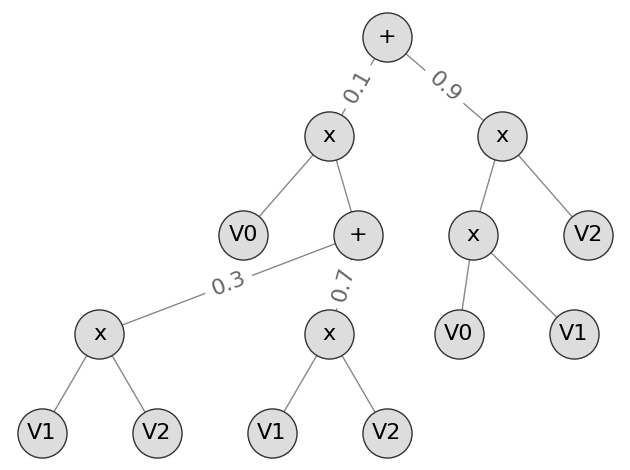

In [ ]:
spn = 0.1 * (Categorical(p=[0.2, 0.8], scope=0) *
             (0.3 * (Categorical(p=[0.3, 0.7], scope=1) *
                     Categorical(p=[0.4, 0.6], scope=2))
            + 0.7 * (Categorical(p=[0.5, 0.5], scope=1) *
                     Categorical(p=[0.6, 0.4], scope=2)))) \
    + 0.9 * (Categorical(p=[0.2, 0.8], scope=0) *
             Categorical(p=[0.3, 0.7], scope=1) *
             Categorical(p=[0.4, 0.6], scope=2))


plot_spn(spn, 'basicspn.png')

In [ ]:
np.random.seed(123)
train_data = np.c_[np.r_[np.random.normal((5,5), 1, (500, 2)), np.random.normal(10, 1, (500, 2))],
                   np.r_[np.zeros((500, 1)), np.ones((500, 1))]]

In [ ]:
spn_classification = learn_classifier(train_data,
                     Context(parametric_types=[Gaussian, Gaussian, Categorical]).add_domains(train_data),
                     learn_parametric, 2)
test_classification = np.array([4.0, 5.0, np.nan, 20.0, 12.0, np.nan, 9.0, 10.0, np.nan]).reshape(-1, 3)

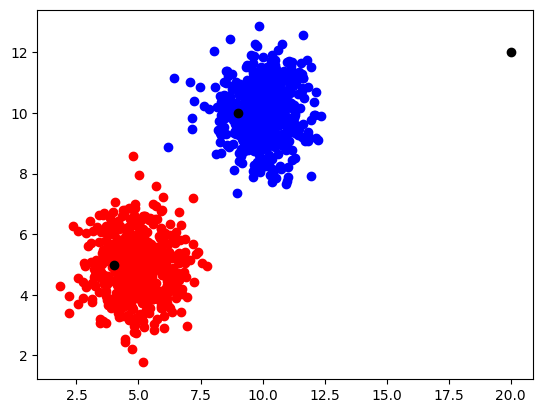

In [ ]:
plt.scatter(train_data[:500,0],train_data[:500,1], color = "red")
plt.scatter(train_data[500:,0],train_data[500:,1], color = "blue")
plt.scatter(test_classification[:,0],test_classification[:,1], color = "black")

In [ ]:
print(mpe(spn_classification, test_classification))

[[ 4.  5.  0.]
 [20. 12.  1.]
 [ 9. 10.  1.]]


/content/gdrive/My Drive/M2/MADI/Projet/Code/spn/structure/leaves/parametric/Inference.py:88: RuntimeWarning: divide by zero encountered in log
  probs[idx_in] = np.array(np.log(node.p))[cat_data[~out_domain_ids]]


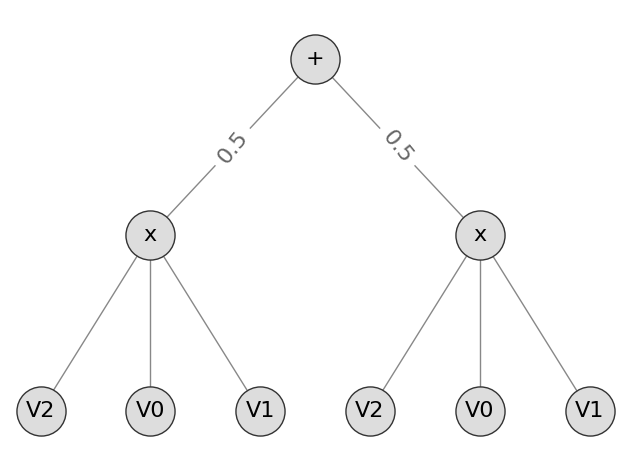

In [ ]:
plot_spn(spn_classification, 'learnedspn.png')

In [ ]:
ll = log_likelihood(spn_classification, test_classification)
print(np.exp(ll))

[[5.06927814e-02]
 [7.59905258e-26]
 [5.12777435e-02]]


/content/gdrive/My Drive/M2/MADI/Projet/Code/spn/structure/leaves/parametric/Inference.py:88: RuntimeWarning: divide by zero encountered in log
  probs[idx_in] = np.array(np.log(node.p))[cat_data[~out_domain_ids]]


## Tests sur l'exemple de l'article

Implémentation du SPN :

In [ ]:
s2 = Sum(weights=[0.6, 0.4], children=[Categorical(p=[0, 1], scope=0), Categorical(p=[0, 1], scope=2)])
s3 = Sum(weights=[0.1, 0.9], children=[Categorical(p=[0, 1], scope=0), Categorical(p=[0, 1], scope=2)])
s4 = Sum(weights=[0.3, 0.7], children=[Categorical(p=[0, 1], scope=1), Categorical(p=[0, 1], scope=3)])
s5 = Sum(weights=[0.8, 0.2], children=[Categorical(p=[0, 1], scope=1), Categorical(p=[0, 1], scope=3)])

p1 = Product(children=[s2,s4])
p2 = Product(children=[s2,s5])
p3 = Product(children=[s3,s5])

s1 = Sum(weights=[0.2, 0.5, 0.3], children=[p1, p2, p3])

assign_ids(s1)
rebuild_scopes_bottom_up(s1)

SumNode_0

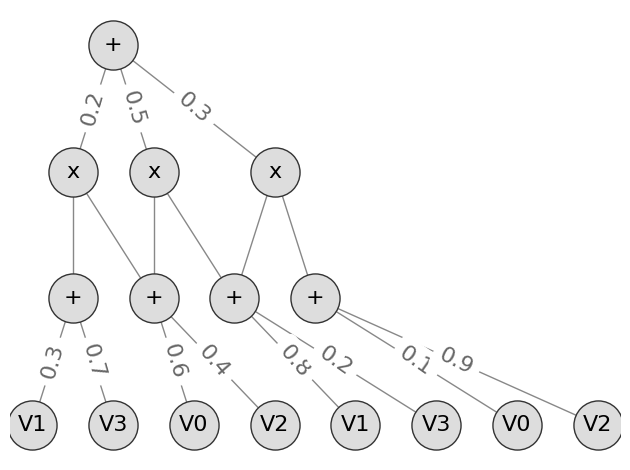

In [ ]:
plot_spn(s1)

Création des données :

In [ ]:
test_classification = np.array([1, 0, 0, 1, np.nan]).reshape(-1,5)

Pour $\lambda = (x_1, x_2, \bar{x}_1, \bar{x}_2) = (1, 0, 0, 1)$, on trouve bien $S(\lambda)=0.15$ :

In [ ]:
l = likelihood(s1, test_classification)
print(l)

[[0.15]]


/content/gdrive/My Drive/M2/MADI/Projet/Code/spn/structure/leaves/parametric/Inference.py:88: RuntimeWarning: divide by zero encountered in log
  probs[idx_in] = np.array(np.log(node.p))[cat_data[~out_domain_ids]]


In [ ]:
cs1 = cspn_from_spn(s1, 0.1)

Sum
Before : 0.2
After : [0.18000000000000002, 0.28]
ProductNode_1
Product
Sum
Before : 0.6
After : [0.54, 0.64]
CategoricalNode_8
CategoricalNode_9
Before : 0.4
After : [0.36000000000000004, 0.4600000000000001]
CategoricalNode_8
CategoricalNode_9
Sum
Before : 0.3
After : [0.27, 0.37]
CategoricalNode_10
CategoricalNode_11
Before : 0.7
After : [0.63, 0.73]
CategoricalNode_10
CategoricalNode_11
ProductNode_2
Product
Sum
Sum
Before : 0.8
After : [0.7200000000000001, 0.8200000000000001]
CategoricalNode_12
CategoricalNode_13
Before : 0.2
After : [0.18000000000000002, 0.28]
CategoricalNode_12
CategoricalNode_13
ProductNode_3
Product
Sum
Before : 0.1
After : [0.09000000000000001, 0.19]
CategoricalNode_14
CategoricalNode_15
Before : 0.9
After : [0.81, 0.91]
CategoricalNode_14
CategoricalNode_15
Sum
Before : 0.5
After : [0.45, 0.55]
ProductNode_1
Product
Sum
Sum
ProductNode_2
Product
Sum
Sum
ProductNode_3
Product
Sum
Sum
Before : 0.3
After : [0.27, 0.37]
ProductNode_1
Product
Sum
Sum
ProductNod

## Chargement des données

On utilise ici le jeu de données *optdigits*.

In [ ]:
train_data = pd.read_csv('../Dataset/optdigits.tra')
train = train_data.values

test_data = pd.read_csv('../Dataset/optdigits.tes')
test = test_data.values

## Apprentissage du SPN à partir des données d'entraînement

In [ ]:
spn_classification = learn_classifier(train,
                       Context(parametric_types=[Categorical]*65).add_domains(train),
                       learn_parametric, 64)

In [ ]:
ll = log_likelihood(spn_classification, test)
print(ll)

[[-7.38105090e+001]
 [-1.79769313e+308]
 [-8.95428040e+001]
 ...
 [-1.79769313e+308]
 [-9.33264639e+001]
 [-1.79769313e+308]]


In [ ]:
print(spn_classification.children[9].children[11].weights)

[0.630890052356021, 0.36910994764397903]


## Extension à un CSPN par $\epsilon $-contamination

In [ ]:
def eps_contamination(spn, eps):
  if isinstance(spn, Sum):
    print('Sum')
    lw = len(spn.weights)
    for i in range(lw):
      if not(isinstance(spn.weights[i], list)):         # Si l'arête n'a pas déjà été 'crédalisée'
        print('Before :', spn.weights[i])
        spn.weights[i] = [(1-eps)*spn.weights[i], (1-eps)*spn.weights[i] + eps]
        print('After :', spn.weights[i])
        for child in spn.children:
          print(child)
          eps_contamination(child, eps)
  elif isinstance(spn, Product):
    print('Product')
    for child in spn.children:
      eps_contamination(child, eps)
  return spn

def cspn_from_spn(spn, eps):
  c_spn = copy.deepcopy(spn)
  return eps_contamination(c_spn, eps)

In [ ]:
cspn = cspn_from_spn(spn_classification, 0.01)

In [ ]:
print(cspn.weights)
print(spn_classification.weights)

[[0.09713500784929356, 0.10713500784929356], [0.1007613814756672, 0.11076138147566719], [0.09843014128728415, 0.10843014128728415], [0.1007613814756672, 0.11076138147566719], [0.10024332810047096, 0.11024332810047095], [0.09739403453689167, 0.10739403453689167], [0.09765306122448979, 0.10765306122448978], [0.10024332810047096, 0.11024332810047095], [0.09843014128728415, 0.10843014128728415], [0.09894819466248038, 0.10894819466248037]]
[0.09811616954474098, 0.10177917320774464, 0.09942438513867086, 0.10177917320774464, 0.10125588697017268, 0.09837781266352695, 0.09863945578231292, 0.10125588697017268, 0.09942438513867086, 0.0999476713762428]


## Adaptation du calcul de la vraisemblance

Il faut résoudre un programme linéaire lorsque l'on rencontre un noeud SOMME :

\begin{equation}
\begin{aligned}
\min \sum_j w_{ij} L^j(\lambda)\\
s.c. \quad w_i \in C_i
\end{aligned}   
\end{equation}

In [ ]:
def lower_sum_likelihood(node, children, dtype=np.float64, **kwargs):
    c = np.ravel(children).tolist()
    A_eq = [np.ravel([1 for i in node.weights]).tolist()]
    b_eq = [1]
    res = scipy.optimize.linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=[(w[0], w[1]) for w in node.weights])
    return np.array(res.fun).reshape(1,1)

_lower_node_likelihood = _node_likelihood.copy()
_lower_node_likelihood[Sum] = lower_sum_likelihood

lcll = likelihood(cs1, test_classification, node_likelihood = _lower_node_likelihood)
print('Lower likelihood :', lcll)

print('Likelihood :', l)

def upper_sum_likelihood(node, children, dtype=np.float64, **kwargs):
    c = (-np.ravel(children)).tolist()
    A_eq = [np.ravel([1 for i in node.weights]).tolist()]
    b_eq = [1]
    res = scipy.optimize.linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=[(w[0], w[1]) for w in node.weights])
    return np.array(-res.fun).reshape(1,1)

_upper_node_likelihood = _node_likelihood.copy()
_upper_node_likelihood[Sum] = upper_sum_likelihood

ucll = likelihood(cs1, test_classification, node_likelihood = _upper_node_likelihood)
print('Upper likelihood :', ucll)

Lower likelihood : [[0.11097]]
Likelihood : [[0.15]]
Upper likelihood : [[0.22582]]


## Dominance crédale pour la classification

In [ ]:
def credal_dominance(c1, c2, cspn):
  S_c1 = likelihood(cspn, c1)
  S_c2 = likelihood(cspn, c2)
  if S_c1[0] - S_c2[0] > 0 :
    return c1
  elif S_c1[0] - S_c2[0] < 0:
    return c2
  else:
    return 0